In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator , img_to_array, load_img
from keras.applications.mobilenet import MobileNet, preprocess_input 
from keras.losses import categorical_crossentropy

In [2]:
# Working with pre trained model 

base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)

In [3]:
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

In [4]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2, 
     shear_range = 0.2, 
     horizontal_flip=True, 
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "dataset/train", 
                                               target_size=(224,224), 
                                               batch_size=32,
                                  )


train_data.class_indices

Found 28709 images belonging to 7 classes.


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [5]:
val_datagen = ImageDataGenerator(rescale=1. / 255)

val_data = val_datagen.flow_from_directory(directory="dataset/test",
                                           target_size=(224, 224),
                                           batch_size=32,
                                           )

Found 7178 images belonging to 7 classes.


In [6]:
## having early stopping and model check point 

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list 
call_back = [es, mc]

In [7]:
hist = model.fit_generator(train_data, 
                           steps_per_epoch= 10, 
                           epochs= 30, 
                           validation_data= val_data, 
                           validation_steps= 8, 
                           callbacks=[es,mc])

Epoch 1/30


/var/folders/vw/4rypl92n2wb3py3wlk9sjt_c0000gn/T/ipykernel_17825/2017952159.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_data,


10/10 [==============================] - ETA: 0s - loss: 19.9972 - accuracy: 0.2344
Epoch 1: val_accuracy improved from -inf to 0.33594, saving model to best_model.h5
10/10 [==============================] - 4s 334ms/step - loss: 19.9972 - accuracy: 0.2344 - val_loss: 14.6688 - val_accuracy: 0.3359
Epoch 2/30


/Users/skull/PycharmProjects/Emotion-detection/venv/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10/10 [==============================] - ETA: 0s - loss: 9.8157 - accuracy: 0.3031 
Epoch 2: val_accuracy improved from 0.33594 to 0.34766, saving model to best_model.h5
10/10 [==============================] - 3s 315ms/step - loss: 9.8157 - accuracy: 0.3031 - val_loss: 7.6554 - val_accuracy: 0.3477
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 6.2637 - accuracy: 0.3656
Epoch 3: val_accuracy improved from 0.34766 to 0.38281, saving model to best_model.h5
10/10 [==============================] - 3s 334ms/step - loss: 6.2637 - accuracy: 0.3656 - val_loss: 5.9861 - val_accuracy: 0.3828
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 6.0545 - accuracy: 0.3219
Epoch 4: val_accuracy did not improve from 0.38281
10/10 [==============================] - 3s 317ms/step - loss: 6.0545 - accuracy: 0.3219 - val_loss: 6.0291 - val_accuracy: 0.3242
Epoch 5/30
10/10 [==============================] - ETA: 0s - loss: 5.7500 - accuracy: 0.3750
Epoch 5: val_accur

In [9]:
# Loading the best fit model 
from keras.models import load_model
model = load_model("best_model.h5")

In [10]:
h =  hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

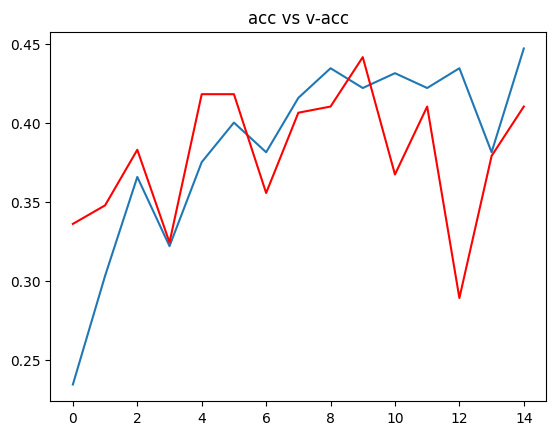

In [11]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

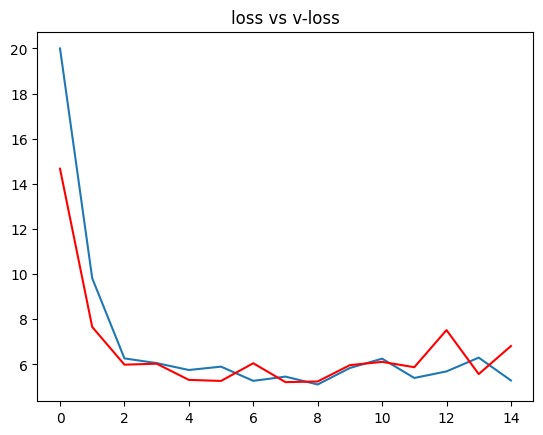

In [12]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [13]:
# just to map o/p values 
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

1/1 [==============================] - 0s 28ms/step
 the image is of happy


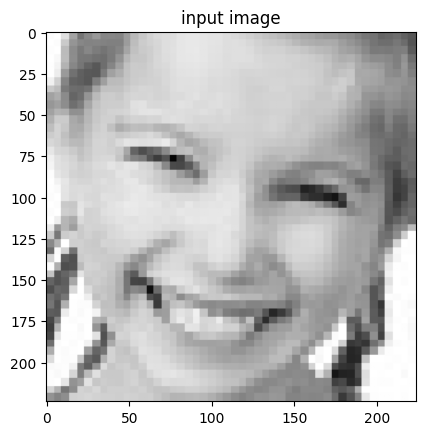

In [16]:
# path for the image to see if it predics correct class

path = "dataset/test/happy/PrivateTest_647018.jpg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image  
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()

In [ ]:
1